MoGPL project by Latifa LECHLECH


import libaries

In [1]:
pip install igraph

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cairocffi

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pycairo 

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import igraph as ig
from igraph import *

In [18]:
class Graph:
    # Orienterd Graph (graphe orienté pondéré)
    def __init__(self,V,labels):
        # Vertex (sommets) 
        self.V = V
        # labels (les noms des somments)
        self.labels = labels
        # Initilalize the 
        self.adj_matrix = np.array([[0]*V for _ in range(V)])

        self.weight = np.array([[0]*V for _ in range(V)]) 

    def add_edges(self,v1, v2,weight):
        self.adj_matrix[v1][v2] = 1
        self.weight[v1][v2] = weight


    def adjacency_matrix(self):
        return self.adj_matrix   

    
     
      
    # Plot functions that use igraph library (pandas libary is used also)
    def plot_graph(self):
        adjacency_matrix = self.adj_matrix 
        adjacency_matrix_df = pd.DataFrame(adjacency_matrix, columns= self.labels, index=self.labels)
        A = adjacency_matrix_df.values
        # Create graph, A.astype(bool).tolist() or (A / A).tolist() can also be used.
        g_test = ig.Graph.Adjacency((A > 0).tolist())

        # Add edge weights and node labels.
        g_test.vs['label'] = self.labels
        g_test.es["weight"] = self.weight.flatten()[self.weight.flatten() != 0].tolist()
        print(g_test.es["weight"])
        layout = g_test.layout(layout='auto')
        return plot(g_test, layout=layout,edge_label=g_test.es["weight"])

    def edges_color(self, path_edges_list):
        gaph_edges, short_path_edges = [], []
        for i in range(len(self.adj_matrix)):
            for j in range(len(self.adj_matrix[i])):
                if self.adj_matrix[i][j] == 1:
                    gaph_edges.append([i,j])

        short_path_edges = [[path_edges_list[i], path_edges_list[i+1]] for i in range(len(path_edges_list)-1)] 

        edges_to_color = []
        for i in range(len(short_path_edges)):
            for j in range(len(gaph_edges)):
                if short_path_edges[i] == gaph_edges [j]:
                    edges_to_color.append(j)

        adjacency_matrix = self.adj_matrix 
        adjacency_matrix_df = pd.DataFrame(adjacency_matrix, columns= self.labels, index=self.labels)
        A = adjacency_matrix_df.values
        # Create graph, A.astype(bool).tolist() or (A / A).tolist() can also be used.
        g_test = ig.Graph.Adjacency((A > 0).tolist())

        # Add edge weights and node labels.
        g_test.vs['label'] = self.labels
        g_test.es["weight"] = self.weight.flatten()[self.weight.flatten() != 0].tolist()           

        edge_colors = ["red" if i in edges_to_color else "black" for i in range(len(g_test.es))]

        # Plot the graph with colored edges
        visual_style = {
            "vertex_color": "lightblue",
            "edge_color": edge_colors,
            "edge_width": 2,
            "bbox": (300, 300),
            "margin": 20
        }

        layout = g_test.layout(layout='auto')
        return plot(g_test, layout=layout,edge_label=g_test.es["weight"],**visual_style)   
    

    def relax(self,d):
        # Find indices where value is equal to 1
        edges = np.where(self.adj_matrix == 1)
        edges = list(zip(edges[0], edges[1]))
        '''
        # ohter_v = self.V.remove(element_to_remove)
        # for i in ohter_v 
        '''
        # Relax  
        # for i from 1 -> n-1 do
        for i in range(1,self.V):  #change this 
            # for (u,v) in E do       
            for edge in edges:
                u = edge[0]
                v = edge[1]
                d_2 = d[i-1,u,0] + self.weight[u,v]
                if d[i,v,0] > d_2:
                    d[i,v,0] = d_2
                    d[i,v,1] = u
            if np.array_equal(d[i-1],d[i]):
                return i,d
            i = i+ 1 
        # Negative Cycle Step    
        for edge in edges:
                u = edge[0]
                v = edge[1]
                d_2 = d[i-1,u,0] + self.weight[u,v]
                if d[i-1,v,0] > d_2:
                    print("Negative Cycle")

        return i,d
 
 
    def ballman_Ford(self):
        source = 0
        # Initialization
        d = np.full((self.V,self.V,2), np.inf)  # d and node that it came from
        d[:,source,0] = np.zeros((self.V))

        i,d = self.relax(d)
        
        # Control if a negative cycle exist 
        print(d[:,source,0])
  
        stop_node = self.V-1 # 4 
        path_list = [stop_node]
        current_node = stop_node

        for j in range(1,i):
            print(d[j,:,0])
            print(d[g.V-i,current_node,1])
            previous_node = int(d[self.V-j,current_node,1])
            path_list = np.append(path_list,previous_node)
            current_node = previous_node
            
        path_list = np.flip(path_list)  
        path_letters =  [self.labels[i] for i in path_list]
        return path_letters,path_list,i
    

In [6]:
def generate_graph(self):
        pass 

Example 1

In [19]:
labels = ['A', 'B', 'C', 'D', 'E', 'F']
#          0    1    2    3     4    5
g = Graph(V=len(labels),labels = labels)

g.add_edges(0,1,3)
g.add_edges(0,2,4)

g.add_edges(1,2,9)
g.add_edges(1,3,2)
g.add_edges(1,4,2)

g.add_edges(2,3,-5)

g.add_edges(3,1,-2)
g.add_edges(3,5,3)

g.add_edges(4,3,3)
g.add_edges(4,5,1)


adjacency_matrix = g.adjacency_matrix() 
adjacency_matrix_df = pd.DataFrame(adjacency_matrix, columns=g.labels, index=labels)
print(adjacency_matrix_df)

weights = g.weight
weight_df = pd.DataFrame(weights, columns=g.labels, index=labels)
print(weight_df)


   A  B  C  D  E  F
A  0  1  1  0  0  0
B  0  0  1  1  1  0
C  0  0  0  1  0  0
D  0  1  0  0  0  1
E  0  0  0  1  0  1
F  0  0  0  0  0  0
   A  B  C  D  E  F
A  0  3  4  0  0  0
B  0  0  9  2  2  0
C  0  0  0 -5  0  0
D  0 -2  0  0  0  3
E  0  0  0  3  0  1
F  0  0  0  0  0  0


[3, 4, 9, 2, 2, -5, -2, 3, 3, 1]


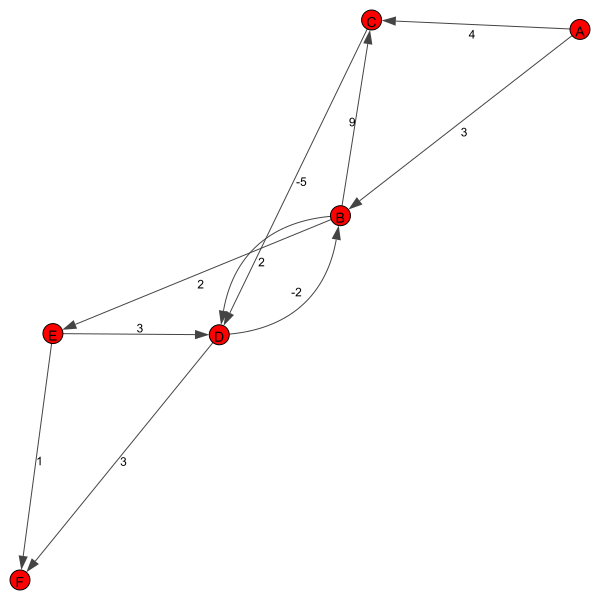

In [20]:
g.plot_graph()

[0. 0. 0. 0. 0. 0.]
[ 0.  3.  4. inf inf inf]
inf
[ 0.  3.  4. -1.  5. inf]
inf
[ 0. -3.  4. -1.  5.  2.]
inf
[ 0. -3.  4. -1. -1.  2.]
inf
[ 0. -3.  4. -1. -1.  0.]
inf
Number of iteration 6
Shortest path ['A', 'C', 'D', 'B', 'E', 'F']


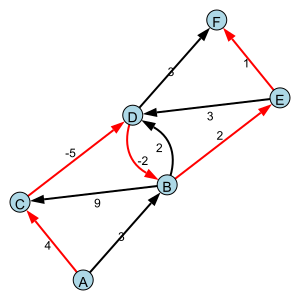

In [21]:
path_edges_list,letters_id,i  = g.ballman_Ford()
print("Number of iteration",i)
print("Shortest path",path_edges_list)
g.edges_color(letters_id)

----

   A  B  C  D  E
A  0  1  1  0  0
B  0  0  0  1  1
C  0  1  0  0  0
D  0  1  0  0  1
E  0  0  1  0  0
   A  B  C  D  E
A  0  6  3  0  0
B  0  0  0  8  1
C  0  2  0  0  0
D  0  1  0  0 -5
E  0  0  2  0  0
[6, 3, 8, 1, 2, 1, -5, 2]


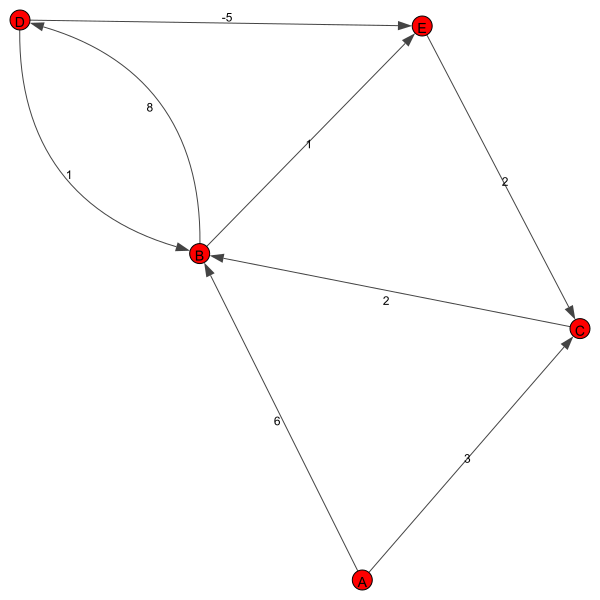

In [22]:
labels = ['A', 'B', 'C', 'D', 'E']
g_2 = Graph(V=5,labels = labels)
g_2.add_edges(0,1,6)
g_2.add_edges(0,2,3)
g_2.add_edges(1,3,8)
g_2.add_edges(1,4,1)
g_2.add_edges(2,1,2)
g_2.add_edges(3,1,1)
g_2.add_edges(3,4,-5)  # g.add_edges(3,4,-5)
g_2.add_edges(4,2,2)

adjacency_matrix = g_2.adjacency_matrix() 
adjacency_matrix_df = pd.DataFrame(adjacency_matrix, columns=g_2.labels, index=g_2.labels)
print(adjacency_matrix_df)

weights = g_2.weight
weight_df = pd.DataFrame(weights, columns=g_2.labels, index=g_2.labels)
print(weight_df)

g_2.plot_graph()

In [23]:
path_edges_list,letters_id,i  = g_2.ballman_Ford()
print("Number of iteration",i)
print("Shortest path",path_edges_list)


[0. 0. 0. 0. 0.]
[ 0.  6.  3. inf inf]
1.0
[ 0.  5.  3. 14.  7.]
2.0
[ 0.  5.  3. 13.  6.]
0.0
Number of iteration 4
Shortest path ['A', 'C', 'B', 'E']


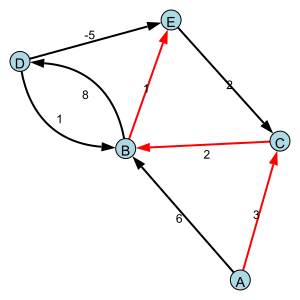

In [25]:
g_2.edges_color(letters_id)


The number of iterations in the Bellman-Ford algorithm is primarily determined by the number of vertices in the graph and the existence of negative-weight cycles. The algorithm guarantees convergence after V-1 iterations where V is the number of vertices in the graph, assuming there are no negative-weight cycles reachable from the source vertex.

However, in some cases, the algorithm may converge in fewer than V-1 iterations:

Early termination: If the algorithm has converged, meaning no distance value is updated in a particular iteration, it can terminate before completing all V-1 iterations.

Optimizations: For certain graph structures or specific inputs, the algorithm might converge earlier due to optimizations or the absence of edges that trigger updates.

Sparse graphs: In a sparse graph (a graph with relatively few edges compared to the number of vertices), there might be fewer updates in each iteration, potentially leading to fewer total iterations required for convergence.